<a href="https://colab.research.google.com/github/SIDHARTHMS26/Portugal-Player-Analysis-and-Real-time-strategy-development/blob/main/Portugal_Player_Analysis_and_Real_Time_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import plotly.express as px

In [4]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv("/content/drive/MyDrive/FIFA 24.csv", encoding='latin-1')
data.head(10)

,player,country,height,weight,age,club,ball_control,dribbling,marking,slide_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
0,Cristian Castro Devenish,Colombia,192,84,22,Atl. Nacional,55,43,NaN,68,...,32,34,41,33,10,11,6,7,9,$1.400.000
1,Silaldo Taffarel,Brazil,181,80,31,Corinthians,69,70,NaN,56,...,65,62,48,46,12,15,14,8,14,$975.00
2,Thomas DÃ¤hne,Germany,193,84,29,Holstein Kiel,25,12,NaN,13,...,20,15,26,16,64,74,65,68,74,$1.100.000
3,Michael Sollbauer,Austria,187,86,33,SK Rapid Wien,46,48,NaN,66,...,25,13,22,19,10,10,8,14,9,$650.00
4,Diego Segovia,Uruguay,191,80,23,Independiente,14,8,NaN,14,...,9,10,16,5,61,59,62,64,64,$300.00
5,ClÃ¡udio Ramos,Portugal,183,83,31,FC Porto,20,16,NaN,13,...,15,13,13,10,72,78,73,64,74,$2.800.000
6,CÃ©dric Zesiger,Switzerland,194,88,25,BSC Young Boys,52,43,NaN,71,...,29,22,34,34,10,5,14,12,5,$1.600.000
7,Pedro Gomes,Portugal,185,75,20,Boavista FC,41,33,NaN,65,...,26,26,39,25,7,6,12,13,11,$230.00
8,Famara DiÃ©dhiou,Senegal,189,80,30,Granada CF,68,67,NaN,16,...,53,39,72,63,11,7,10,15,12,$1.400.000
9,Sibiry Keita,Mali,173,67,22,KAS Eupen,65,67,NaN,30,...,53,31,58,60,8,12,8,5,15,$475.00


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   player          5682 non-null   object 
 1   country         5682 non-null   object 
 2   height          5682 non-null   int64  
 3   weight          5682 non-null   int64  
 4   age             5682 non-null   int64  
 5   club            5682 non-null   object 
 6   ball_control    5682 non-null   int64  
 7   dribbling       5682 non-null   int64  
 8   marking         0 non-null      float64
 9   slide_tackle    5682 non-null   int64  
 10  stand_tackle    5682 non-null   int64  
 11  aggression      5682 non-null   int64  
 12  reactions       5682 non-null   int64  
 13  att_position    5682 non-null   int64  
 14  interceptions   5682 non-null   int64  
 15  vision          5682 non-null   int64  
 16  composure       5682 non-null   int64  
 17  crossing        5682 non-null   i

In [7]:
data['country'].unique()

array(['Colombia', 'Brazil', 'Germany', 'Austria', 'Uruguay', 'Portugal',
       'Switzerland', 'Senegal', 'Mali', 'Saudi Arabia', 'Sweden',
       'India', 'England', 'Scotland', 'France', 'Korea Republic',
       'Italy', 'Norway', 'Turkey', 'Argentina', 'Republic of Ireland',
       'New Zealand', 'Poland', 'Ukraine', 'Chile', 'Romania',
       'Netherlands', 'Egypt', 'Spain', 'Denmark', 'Australia', 'Curacao',
       'Paraguay', 'Bolivia', 'Slovenia', 'Ecuador', 'Albania', 'Wales',
       'Morocco', 'China PR', 'Japan', 'Croatia', 'Peru', 'Ivory Coast',
       'South Africa', 'Ghana', 'Canada', 'Nigeria', 'Mauritius',
       'Iceland', 'Belgium', 'Jamaica', 'Zambia', 'Cape Verde',
       'United States', 'Northern Ireland', 'Indonesia',
       'United Arab Emirates', 'Greece', 'Burkina Faso',
       'Bosnia & Herzegovina', 'DR Congo', 'Guinea', 'Zimbabwe',
       'North Macedonia', 'Madagascar', 'Gabon', 'Hungary', 'Afghanistan',
       'Finland', 'Mexico', 'Guatemala', 'Sudan', 'I

In [8]:
df = data.loc[data['country'] == 'Portugal']
df

,player,country,height,weight,age,club,ball_control,dribbling,marking,slide_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
5,ClÃ¡udio Ramos,Portugal,183,83,31,FC Porto,20,16,NaN,13,...,15,13,13,10,72,78,73,64,74,$2.800.000
7,Pedro Gomes,Portugal,185,75,20,Boavista FC,41,33,NaN,65,...,26,26,39,25,7,6,12,13,11,$230.00
284,JosuÃ©,Portugal,174,68,32,Legia Warszawa,77,74,NaN,55,...,77,73,72,69,16,15,10,15,10,$2.500.000
297,TomÃ¡s AraÃºjo,Portugal,186,83,21,Gil Vicente,56,45,NaN,68,...,30,30,39,34,9,12,11,7,13,$1.000.000
333,Tiago Maria Antunes Gouveia,Portugal,176,72,22,Estoril Praia,70,76,NaN,29,...,54,42,57,62,8,12,13,14,15,$2.200.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5448,Verdasca,Portugal,185,81,26,ÅlÄ sk WrocÅaw,60,49,NaN,60,...,37,34,47,30,5,13,7,14,7,$700.00
5570,TrincÃ£o,Portugal,184,76,23,Sporting CP,81,83,NaN,34,...,83,56,67,66,15,5,9,6,7,$9.000.000
5579,Miguel Veloso,Portugal,180,79,37,Hellas Verona,83,72,NaN,66,...,83,79,73,70,8,16,7,9,15,$1.800.000
5635,JoÃ£o QueirÃ³s,Portugal,190,81,25,GD Chaves,46,38,NaN,64,...,44,28,46,35,8,6,6,7,6,$850.00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 5 to 5680
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   player          102 non-null    object 
 1   country         102 non-null    object 
 2   height          102 non-null    int64  
 3   weight          102 non-null    int64  
 4   age             102 non-null    int64  
 5   club            102 non-null    object 
 6   ball_control    102 non-null    int64  
 7   dribbling       102 non-null    int64  
 8   marking         0 non-null      float64
 9   slide_tackle    102 non-null    int64  
 10  stand_tackle    102 non-null    int64  
 11  aggression      102 non-null    int64  
 12  reactions       102 non-null    int64  
 13  att_position    102 non-null    int64  
 14  interceptions   102 non-null    int64  
 15  vision          102 non-null    int64  
 16  composure       102 non-null    int64  
 17  crossing        102 non-null    int64  

In [10]:
df.isna().sum()

,0
player,0
country,0
height,0
weight,0
age,0
club,0
ball_control,0
dribbling,0
marking,102
slide_tackle,0


In [11]:
df['marking'].dropna()

,marking


In [12]:
df['country'].unique()

array(['Portugal'], dtype=object)

In [13]:
df.head(100)

,player,country,height,weight,age,club,ball_control,dribbling,marking,slide_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
5,ClÃ¡udio Ramos,Portugal,183,83,31,FC Porto,20,16,NaN,13,...,15,13,13,10,72,78,73,64,74,$2.800.000
7,Pedro Gomes,Portugal,185,75,20,Boavista FC,41,33,NaN,65,...,26,26,39,25,7,6,12,13,11,$230.00
284,JosuÃ©,Portugal,174,68,32,Legia Warszawa,77,74,NaN,55,...,77,73,72,69,16,15,10,15,10,$2.500.000
297,TomÃ¡s AraÃºjo,Portugal,186,83,21,Gil Vicente,56,45,NaN,68,...,30,30,39,34,9,12,11,7,13,$1.000.000
333,Tiago Maria Antunes Gouveia,Portugal,176,72,22,Estoril Praia,70,76,NaN,29,...,54,42,57,62,8,12,13,14,15,$2.200.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,NÃ© Lopes,Portugal,185,77,23,Gil Vicente,40,31,NaN,70,...,33,34,46,32,14,9,11,6,11,$750.00
5407,Daniel Alexis Leite Figueira,Portugal,189,82,25,Estoril Praia,18,14,NaN,11,...,12,14,15,8,71,72,69,68,75,$2.600.000
5448,Verdasca,Portugal,185,81,26,ÅlÄ sk WrocÅaw,60,49,NaN,60,...,37,34,47,30,5,13,7,14,7,$700.00
5570,TrincÃ£o,Portugal,184,76,23,Sporting CP,81,83,NaN,34,...,83,56,67,66,15,5,9,6,7,$9.000.000


In [14]:
df[df['player'] == 'Cristiano Ronaldo']

,player,country,height,weight,age,club,ball_control,dribbling,marking,slide_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
5680,Cristiano Ronaldo,Portugal,187,83,38,Al Nassr,87,81,NaN,24,...,79,75,90,85,14,7,11,15,11,$31.000.000


In [15]:
df = df.drop('marking', axis = 1)
df

,player,country,height,weight,age,club,ball_control,dribbling,slide_tackle,stand_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
5,ClÃ¡udio Ramos,Portugal,183,83,31,FC Porto,20,16,13,17,...,15,13,13,10,72,78,73,64,74,$2.800.000
7,Pedro Gomes,Portugal,185,75,20,Boavista FC,41,33,65,70,...,26,26,39,25,7,6,12,13,11,$230.00
284,JosuÃ©,Portugal,174,68,32,Legia Warszawa,77,74,55,53,...,77,73,72,69,16,15,10,15,10,$2.500.000
297,TomÃ¡s AraÃºjo,Portugal,186,83,21,Gil Vicente,56,45,68,73,...,30,30,39,34,9,12,11,7,13,$1.000.000
333,Tiago Maria Antunes Gouveia,Portugal,176,72,22,Estoril Praia,70,76,29,36,...,54,42,57,62,8,12,13,14,15,$2.200.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5448,Verdasca,Portugal,185,81,26,ÅlÄ sk WrocÅaw,60,49,60,62,...,37,34,47,30,5,13,7,14,7,$700.00
5570,TrincÃ£o,Portugal,184,76,23,Sporting CP,81,83,34,36,...,83,56,67,66,15,5,9,6,7,$9.000.000
5579,Miguel Veloso,Portugal,180,79,37,Hellas Verona,83,72,66,67,...,83,79,73,70,8,16,7,9,15,$1.800.000
5635,JoÃ£o QueirÃ³s,Portugal,190,81,25,GD Chaves,46,38,64,66,...,44,28,46,35,8,6,6,7,6,$850.00


In [16]:
df.columns.unique()

Index(['player', 'country', 'height', 'weight', 'age', 'club', 'ball_control',
       'dribbling', 'slide_tackle', 'stand_tackle', 'aggression', 'reactions',
       'att_position', 'interceptions', 'vision', 'composure', 'crossing',
       'short_pass', 'long_pass', 'acceleration', 'stamina', 'strength',
       'balance', 'sprint_speed', 'agility', 'jumping', 'heading',
       'shot_power', 'finishing', 'long_shots', 'curve', 'fk_acc', 'penalties',
       'volleys', 'gk_positioning', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'value'],
      dtype='object')

In [17]:
df.age.unique()

array([31, 20, 32, 21, 22, 30, 28, 26, 33, 29, 19, 23, 35, 24, 27, 25, 18,
       34, 39, 37, 38])

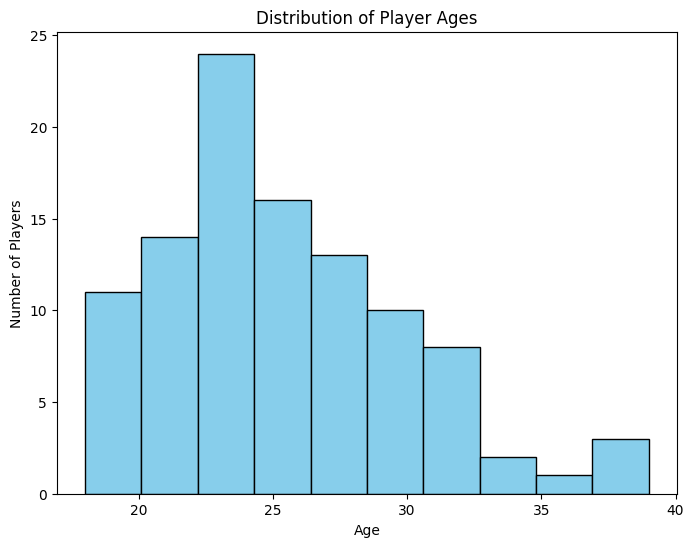

In [18]:
plt.figure(figsize=(8, 6))
plt.hist(df['age'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.title('Distribution of Player Ages')
plt.show()

**From the above graph we can easily say that most players are between the age group of 20-25. Which is considered prime time of a player**

In [19]:
df['value'].info()

<class 'pandas.core.series.Series'>
Index: 102 entries, 5 to 5680
Series name: value
Non-Null Count  Dtype 
--------------  ----- 
102 non-null    object
dtypes: object(1)
memory usage: 1.6+ KB


In [20]:
df.value.unique()

array(['$2.800.000', '$230.00 ', '$2.500.000', '$1.000.000', '$2.200.000',
       '$14.500.000', '$425.00 ', '$6.000.000', '$1.200.000',
       '$1.100.000', '$1.300.000', '$750.00 ', '$650.00 ', '$17.000.000',
       '$5.000.000', '$2.100.000', '$20.000.000', '$1.400.000',
       '$3.000.000', '$2.400.000', '$625.00 ', '$950.00 ', '$16.000.000',
       '$800.00 ', '$1.600.000', '$600.00 ', '$25.500.000', '$875.00 ',
       '$675.00 ', '$1.500.000', '$975.00 ', '$6.500.000', '$400.00 ',
       '$22.500.000', '$240.00 ', '$825.00 ', '$275.00 ', '$925.00 ',
       '$1.900.000', '$15.000.000', '$475.00 ', '$11.000.000',
       '$72.500.000', '$350.00 ', '$3.300.000', '$12.500.000',
       '$4.900.000', '$3.800.000', '$43.500.000', '$2.600.000',
       '$8.000.000', '$72.000.000', '$4.600.000', '$3.400.000',
       '$850.00 ', '$500.00 ', '$22.000.000', '$775.00 ', '$48.500.000',
       '$700.00 ', '$9.000.000', '$1.800.000', '$31.000.000'],
      dtype=object)

In [21]:
df

,player,country,height,weight,age,club,ball_control,dribbling,slide_tackle,stand_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
5,ClÃ¡udio Ramos,Portugal,183,83,31,FC Porto,20,16,13,17,...,15,13,13,10,72,78,73,64,74,$2.800.000
7,Pedro Gomes,Portugal,185,75,20,Boavista FC,41,33,65,70,...,26,26,39,25,7,6,12,13,11,$230.00
284,JosuÃ©,Portugal,174,68,32,Legia Warszawa,77,74,55,53,...,77,73,72,69,16,15,10,15,10,$2.500.000
297,TomÃ¡s AraÃºjo,Portugal,186,83,21,Gil Vicente,56,45,68,73,...,30,30,39,34,9,12,11,7,13,$1.000.000
333,Tiago Maria Antunes Gouveia,Portugal,176,72,22,Estoril Praia,70,76,29,36,...,54,42,57,62,8,12,13,14,15,$2.200.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5448,Verdasca,Portugal,185,81,26,ÅlÄ sk WrocÅaw,60,49,60,62,...,37,34,47,30,5,13,7,14,7,$700.00
5570,TrincÃ£o,Portugal,184,76,23,Sporting CP,81,83,34,36,...,83,56,67,66,15,5,9,6,7,$9.000.000
5579,Miguel Veloso,Portugal,180,79,37,Hellas Verona,83,72,66,67,...,83,79,73,70,8,16,7,9,15,$1.800.000
5635,JoÃ£o QueirÃ³s,Portugal,190,81,25,GD Chaves,46,38,64,66,...,44,28,46,35,8,6,6,7,6,$850.00


In [22]:
# Clean the player name column
def clean_player_name(name):
    if isinstance(name, str):  # Check if it is a string to avoid errors
        return ''.join(c for c in name if c.isalnum() or c.isspace()) # keep alphanumeric characters and space
    else:
        return name # return as is for non-string values

df['player'] = df['player'].apply(clean_player_name)
df

,player,country,height,weight,age,club,ball_control,dribbling,slide_tackle,stand_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
5,ClÃudio Ramos,Portugal,183,83,31,FC Porto,20,16,13,17,...,15,13,13,10,72,78,73,64,74,$2.800.000
7,Pedro Gomes,Portugal,185,75,20,Boavista FC,41,33,65,70,...,26,26,39,25,7,6,12,13,11,$230.00
284,JosuÃ,Portugal,174,68,32,Legia Warszawa,77,74,55,53,...,77,73,72,69,16,15,10,15,10,$2.500.000
297,TomÃs AraÃºjo,Portugal,186,83,21,Gil Vicente,56,45,68,73,...,30,30,39,34,9,12,11,7,13,$1.000.000
333,Tiago Maria Antunes Gouveia,Portugal,176,72,22,Estoril Praia,70,76,29,36,...,54,42,57,62,8,12,13,14,15,$2.200.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5448,Verdasca,Portugal,185,81,26,ÅlÄ sk WrocÅaw,60,49,60,62,...,37,34,47,30,5,13,7,14,7,$700.00
5570,TrincÃo,Portugal,184,76,23,Sporting CP,81,83,34,36,...,83,56,67,66,15,5,9,6,7,$9.000.000
5579,Miguel Veloso,Portugal,180,79,37,Hellas Verona,83,72,66,67,...,83,79,73,70,8,16,7,9,15,$1.800.000
5635,JoÃo QueirÃ³s,Portugal,190,81,25,GD Chaves,46,38,64,66,...,44,28,46,35,8,6,6,7,6,$850.00


In [23]:
filtered_df = df[(df['age'] >= 19) & (df['age'] <= 32)]
df = filtered_df.sort_values(by='age')

print("\nPlayers aged 19-34, sorted by age:")
df.reset_index(drop=True, inplace=True)
df


Players aged 19-34, sorted by age:


,player,country,height,weight,age,club,ball_control,dribbling,slide_tackle,stand_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
0,Miguel FalÃ,Portugal,178,78,19,SC Braga,62,67,47,45,...,57,43,62,53,14,10,10,14,7,$500.00
1,GonÃalo Esteves,Portugal,171,73,19,Sporting CP,70,69,66,68,...,66,43,42,39,10,13,6,11,6,$1.300.000
2,AntÃ³nio Silva,Portugal,187,80,19,SL Benfica,73,69,73,78,...,31,26,40,29,6,12,10,8,8,$5.000.000
3,Nazinho,Portugal,179,75,20,Sporting CP,59,56,65,67,...,39,37,44,29,6,6,5,14,6,$800.00
4,Pedro Gomes,Portugal,185,75,20,Boavista FC,41,33,65,70,...,26,26,39,25,7,6,12,13,11,$230.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,NÃlson Oliveira,Portugal,185,82,32,PAOK FC,74,72,29,40,...,63,56,80,74,7,8,7,7,10,$3.000.000
91,Roderick Miranda,Portugal,191,85,32,Melb. Victory,58,51,70,69,...,42,32,20,43,6,12,14,8,12,$950.00
92,JosuÃ,Portugal,174,68,32,Legia Warszawa,77,74,55,53,...,77,73,72,69,16,15,10,15,10,$2.500.000
93,Anthony Lopes,Portugal,184,81,32,OL,21,15,13,15,...,15,14,16,13,80,84,78,71,86,$16.000.000


**We filtered the data set to the most preffered age a player can play at his atmost best and provide for the team**

In [24]:
bc = df.groupby('player')['ball_control'].mean().sort_values(ascending=False)
bc.head(10)

,ball_control
player,
JoÃo FÃlix,87.0
JoÃo Cancelo,86.0
Rafael LeÃo,86.0
Bruno Fernandes,84.0
TrincÃo,81.0
Renato Sanches,81.0
NÃlson Semedo,80.0
Nuno Santos,80.0
Daniel BraganÃa,80.0


**We can clearly see the top 10 players in the current squad who can keep the ball**

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   player          95 non-null     object
 1   country         95 non-null     object
 2   height          95 non-null     int64 
 3   weight          95 non-null     int64 
 4   age             95 non-null     int64 
 5   club            95 non-null     object
 6   ball_control    95 non-null     int64 
 7   dribbling       95 non-null     int64 
 8   slide_tackle    95 non-null     int64 
 9   stand_tackle    95 non-null     int64 
 10  aggression      95 non-null     int64 
 11  reactions       95 non-null     int64 
 12  att_position    95 non-null     int64 
 13  interceptions   95 non-null     int64 
 14  vision          95 non-null     int64 
 15  composure       95 non-null     int64 
 16  crossing        95 non-null     int64 
 17  short_pass      95 non-null     int64 
 18  long_pass   

In [26]:
df['player'] = df['player'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   player          95 non-null     object
 1   country         95 non-null     object
 2   height          95 non-null     int64 
 3   weight          95 non-null     int64 
 4   age             95 non-null     int64 
 5   club            95 non-null     object
 6   ball_control    95 non-null     int64 
 7   dribbling       95 non-null     int64 
 8   slide_tackle    95 non-null     int64 
 9   stand_tackle    95 non-null     int64 
 10  aggression      95 non-null     int64 
 11  reactions       95 non-null     int64 
 12  att_position    95 non-null     int64 
 13  interceptions   95 non-null     int64 
 14  vision          95 non-null     int64 
 15  composure       95 non-null     int64 
 16  crossing        95 non-null     int64 
 17  short_pass      95 non-null     int64 
 18  long_pass   

In [27]:
gk_hand = df.groupby('player')['gk_handling'].mean().sort_values(ascending = False)
gk_hand.head(10)

,gk_handling
player,
Anthony Lopes,78.0
JosÃ SÃ,78.0
Rui Silva,77.0
ClÃudio Ramos,73.0
Daniel Alexis Leite Figueira,69.0
AndrÃ Moreira,67.0
Joel Pereira,64.0
Celton Biai,59.0
Tiago Dantas,15.0


In [28]:
gk_hand.head(3)

,gk_handling
player,
Anthony Lopes,78.0
JosÃ SÃ,78.0
Rui Silva,77.0


In [29]:
stricker = df.groupby('player')['finishing'].mean().sort_values(ascending = False)
stricker.head(10)

,finishing
player,
Bruno Fernandes,83.0
Rafael LeÃo,80.0
GonÃalo Ramos,80.0
JoÃo FÃlix,79.0
Nuno Santos,77.0
GonÃalo PaciÃªncia,76.0
Dany Mota,76.0
NÃlson Oliveira,73.0
Gedson Fernandes,72.0


In [30]:
df.age.unique()

array([19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

In [31]:
df.isna().sum()

,0
player,0
country,0
height,0
weight,0
age,0
club,0
ball_control,0
dribbling,0
slide_tackle,0
stand_tackle,0


**Currently the nan values and null values are corrected or dropped**

In [32]:
speed = df.groupby('player')['acceleration'].mean().sort_values(ascending = False)
speed.head(10)

,acceleration
player,
Gelson Martins,91.0
Bruma,91.0
Carlos Manuel Cardoso ManÃ,90.0
Rafael LeÃo,90.0
Tiago Maria Antunes Gouveia,86.0
JoÃo Cancelo,86.0
Renato Sanches,85.0
Francisco ConceiÃÃo,85.0
Ãmaro EmbalÃ³,85.0


**We have noted the players with the most accelaration as it would be a key factor for the team preparation**

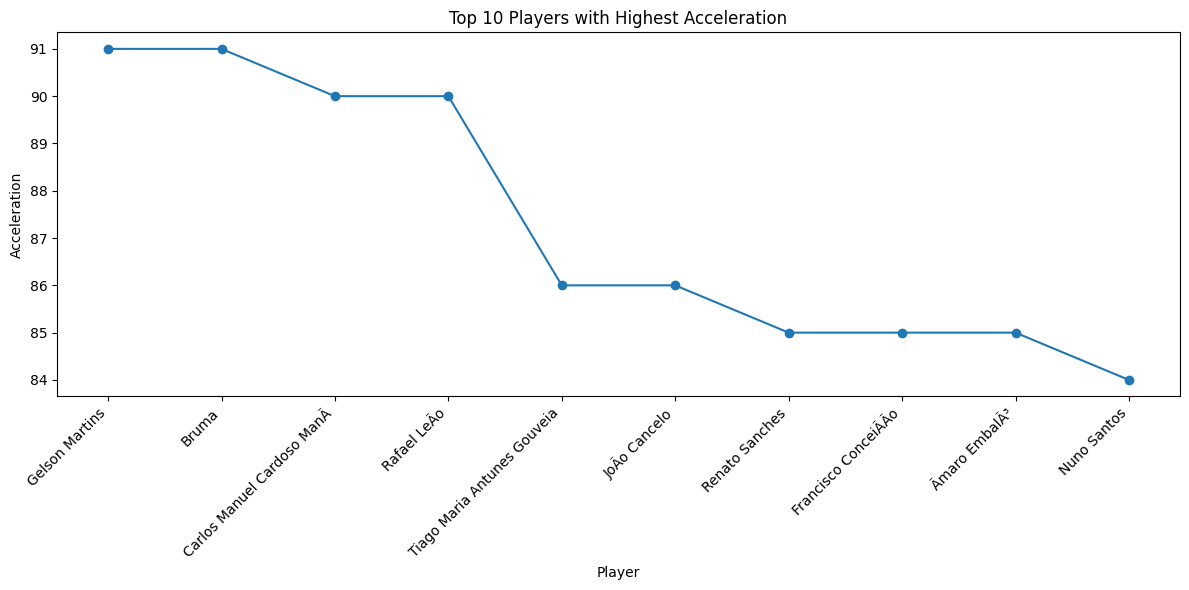

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(speed.head(10).index, speed.head(10).values, marker='o', linestyle='-')
plt.xlabel("Player")
plt.ylabel("Acceleration")
plt.title("Top 10 Players with Highest Acceleration")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**This helps us to understand which players can be used to take the game forward**

In [34]:
df.columns.unique()

Index(['player', 'country', 'height', 'weight', 'age', 'club', 'ball_control',
       'dribbling', 'slide_tackle', 'stand_tackle', 'aggression', 'reactions',
       'att_position', 'interceptions', 'vision', 'composure', 'crossing',
       'short_pass', 'long_pass', 'acceleration', 'stamina', 'strength',
       'balance', 'sprint_speed', 'agility', 'jumping', 'heading',
       'shot_power', 'finishing', 'long_shots', 'curve', 'fk_acc', 'penalties',
       'volleys', 'gk_positioning', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'value'],
      dtype='object')

In [35]:
df.stamina.unique()

array([61, 83, 62, 64, 68, 70, 54, 67, 73, 52, 59, 55, 48, 72, 63, 89, 76,
       79, 58, 69, 56, 75, 74, 27, 77, 65, 86, 81, 24, 71, 53, 42, 34, 84,
       50, 78, 93, 91, 85, 66, 44, 36])

In [36]:
defend = df.groupby('player')['interceptions'].mean().sort_values(ascending = False)
defend.head(10)

,interceptions
player,
JoÃo Cancelo,81.0
AntÃ³nio Silva,80.0
GonÃalo InÃcio,78.0
David Carmo,78.0
Filipe Relvas,76.0
Diogo Dalot,76.0
NÃlson Semedo,76.0
Gedson Fernandes,75.0
Tiago DjalÃ³,75.0


In [37]:
fig = px.bar(defend.head(10),
             x=defend.head(10).index,
             y=defend.head(10).values,
             labels={'x': 'Player', 'y': 'Interceptions'},
             title='Top 10 Players by Interceptions')
fig.show()

**These are the available top 10 players suitable for defending positions**

In [38]:
df.att_position.unique()

array([62, 65, 25, 51, 27, 48, 67, 58, 44, 61, 52, 29, 32, 66, 56, 80, 46,
       64, 76, 72, 84, 63, 49, 22,  6, 70, 82, 77, 73, 74, 53,  9, 41, 60,
       54, 31, 71, 13, 14, 39, 81, 85, 20, 45, 17, 10])

In [39]:
fk = df.groupby('player')['fk_acc'].mean().sort_values(ascending = False)
fk.head(10)

,fk_acc
player,
Bruno Fernandes,85.0
Gedson Fernandes,76.0
LuÃs Martins,73.0
JosuÃ,73.0
Nuno Santos,72.0
KÃvin Rodrigues,72.0
Chiquinho,71.0
Heriberto Tavares,70.0
Bruma,70.0


In [40]:
fig = px.line(fk.head(10), x=fk.head(10).index, y=fk.head(10).values,
              labels={'x': 'Player', 'y': 'Freekick Accuracy'},
              title='Top 10 Players with Highest Freekick Accuracy')
fig.update_xaxes(tickangle=45)
fig.show()

**It would be wise to include a player with high freekick accuracy to make advantage of set pieces**

In [41]:
df.columns.unique()

Index(['player', 'country', 'height', 'weight', 'age', 'club', 'ball_control',
       'dribbling', 'slide_tackle', 'stand_tackle', 'aggression', 'reactions',
       'att_position', 'interceptions', 'vision', 'composure', 'crossing',
       'short_pass', 'long_pass', 'acceleration', 'stamina', 'strength',
       'balance', 'sprint_speed', 'agility', 'jumping', 'heading',
       'shot_power', 'finishing', 'long_shots', 'curve', 'fk_acc', 'penalties',
       'volleys', 'gk_positioning', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'value'],
      dtype='object')

In [42]:
df.dtypes

,0
player,object
country,object
height,int64
weight,int64
age,int64
club,object
ball_control,int64
dribbling,int64
slide_tackle,int64
stand_tackle,int64


In [43]:
df.drop('value', axis = 1)

,player,country,height,weight,age,club,ball_control,dribbling,slide_tackle,stand_tackle,...,long_shots,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes
0,Miguel FalÃ,Portugal,178,78,19,SC Braga,62,67,47,45,...,46,57,43,62,53,14,10,10,14,7
1,GonÃalo Esteves,Portugal,171,73,19,Sporting CP,70,69,66,68,...,30,66,43,42,39,10,13,6,11,6
2,AntÃ³nio Silva,Portugal,187,80,19,SL Benfica,73,69,73,78,...,22,31,26,40,29,6,12,10,8,8
3,Nazinho,Portugal,179,75,20,Sporting CP,59,56,65,67,...,31,39,37,44,29,6,6,5,14,6
4,Pedro Gomes,Portugal,185,75,20,Boavista FC,41,33,65,70,...,24,26,26,39,25,7,6,12,13,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,NÃlson Oliveira,Portugal,185,82,32,PAOK FC,74,72,29,40,...,69,63,56,80,74,7,8,7,7,10
91,Roderick Miranda,Portugal,191,85,32,Melb. Victory,58,51,70,69,...,28,42,32,20,43,6,12,14,8,12
92,JosuÃ,Portugal,174,68,32,Legia Warszawa,77,74,55,53,...,71,77,73,72,69,16,15,10,15,10
93,Anthony Lopes,Portugal,184,81,32,OL,21,15,13,15,...,18,15,14,16,13,80,84,78,71,86


In [44]:
df.columns.unique()

Index(['player', 'country', 'height', 'weight', 'age', 'club', 'ball_control',
       'dribbling', 'slide_tackle', 'stand_tackle', 'aggression', 'reactions',
       'att_position', 'interceptions', 'vision', 'composure', 'crossing',
       'short_pass', 'long_pass', 'acceleration', 'stamina', 'strength',
       'balance', 'sprint_speed', 'agility', 'jumping', 'heading',
       'shot_power', 'finishing', 'long_shots', 'curve', 'fk_acc', 'penalties',
       'volleys', 'gk_positioning', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'value'],
      dtype='object')

In [45]:
df = df.drop(['club', 'value', 'sprint_speed'], axis = 1)

In [46]:
df

,player,country,height,weight,age,ball_control,dribbling,slide_tackle,stand_tackle,aggression,...,long_shots,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes
0,Miguel FalÃ,Portugal,178,78,19,62,67,47,45,45,...,46,57,43,62,53,14,10,10,14,7
1,GonÃalo Esteves,Portugal,171,73,19,70,69,66,68,62,...,30,66,43,42,39,10,13,6,11,6
2,AntÃ³nio Silva,Portugal,187,80,19,73,69,73,78,63,...,22,31,26,40,29,6,12,10,8,8
3,Nazinho,Portugal,179,75,20,59,56,65,67,58,...,31,39,37,44,29,6,6,5,14,6
4,Pedro Gomes,Portugal,185,75,20,41,33,65,70,46,...,24,26,26,39,25,7,6,12,13,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,NÃlson Oliveira,Portugal,185,82,32,74,72,29,40,74,...,69,63,56,80,74,7,8,7,7,10
91,Roderick Miranda,Portugal,191,85,32,58,51,70,69,77,...,28,42,32,20,43,6,12,14,8,12
92,JosuÃ,Portugal,174,68,32,77,74,55,53,82,...,71,77,73,72,69,16,15,10,15,10
93,Anthony Lopes,Portugal,184,81,32,21,15,13,15,45,...,18,15,14,16,13,80,84,78,71,86


In [47]:
df.columns.unique()

Index(['player', 'country', 'height', 'weight', 'age', 'ball_control',
       'dribbling', 'slide_tackle', 'stand_tackle', 'aggression', 'reactions',
       'att_position', 'interceptions', 'vision', 'composure', 'crossing',
       'short_pass', 'long_pass', 'acceleration', 'stamina', 'strength',
       'balance', 'agility', 'jumping', 'heading', 'shot_power', 'finishing',
       'long_shots', 'curve', 'fk_acc', 'penalties', 'volleys',
       'gk_positioning', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes'],
      dtype='object')

In [48]:
gk_df = df.groupby(['player', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes'])['gk_positioning'].mean().sort_values(ascending = False)
gk_df.head(10).reset_index()

,player,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_positioning
0,Rui Silva,80,77,77,83,81.0
1,Anthony Lopes,84,78,71,86,80.0
2,JosÃ SÃ,81,78,73,82,78.0
3,ClÃudio Ramos,78,73,64,74,72.0
4,Daniel Alexis Leite Figueira,72,69,68,75,71.0
5,AndrÃ Moreira,68,67,66,67,68.0
6,Joel Pereira,66,64,65,67,64.0
7,Celton Biai,63,59,60,67,59.0
8,JosuÃ,15,10,15,10,16.0
9,KÃvin Rodrigues,11,14,11,16,15.0


**Players suitable for Goal Keeper position are filtered out. As a team consist of only two Goal Keepers. We have two players 'Rui Silva' and 'Anthony Lopes. And we have 'Josa Sa' as third goalkeeper**

In [50]:
fig = px.scatter(gk_df.head(10).reset_index(), x="player", y="gk_positioning",
                 color="gk_reflexes", size="gk_handling", hover_data=['gk_kicking', 'gk_reflexes'])
fig.show()

In [52]:
df.columns.unique()

Index(['player', 'country', 'height', 'weight', 'age', 'ball_control',
       'dribbling', 'slide_tackle', 'stand_tackle', 'aggression', 'reactions',
       'att_position', 'interceptions', 'vision', 'composure', 'crossing',
       'short_pass', 'long_pass', 'acceleration', 'stamina', 'strength',
       'balance', 'agility', 'jumping', 'heading', 'shot_power', 'finishing',
       'long_shots', 'curve', 'fk_acc', 'penalties', 'volleys',
       'gk_positioning', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes'],
      dtype='object')

In [57]:
def_df = df.groupby(['player','age', 'composure', 'strength', 'slide_tackle', 'stand_tackle', 'aggression', 'reactions'])['interceptions'].mean().sort_values(ascending = False)
def_df.head(10).reset_index()

,player,age,composure,strength,slide_tackle,stand_tackle,aggression,reactions,interceptions
0,JoÃo Cancelo,29,85,62,79,83,76,84,81.0
1,AntÃ³nio Silva,19,77,82,73,78,63,78,80.0
2,GonÃalo InÃcio,22,75,78,79,82,77,77,78.0
3,David Carmo,24,70,92,76,79,80,76,78.0
4,Filipe Relvas,23,70,79,68,70,67,79,76.0
5,Diogo Dalot,24,78,76,77,77,81,79,76.0
6,NÃlson Semedo,29,78,68,76,77,81,76,76.0
7,Renato Sanches,26,83,83,65,74,84,80,75.0
8,Gedson Fernandes,24,79,71,72,77,78,79,75.0
9,Tiago DjalÃ³,23,69,84,75,78,74,73,75.0


**In most competitive matches 5 substitute players are allowed in whole. Taking into consideration of the whole team we tend to select 8 players for defending positions. The top 8 are the ones considered according to the statistics.**

In [58]:
fig = px.histogram(def_df.head(10).reset_index(), x="player", y="interceptions",
                   title="Top 10 Defenders by Interceptions",
                   labels={"player": "Player", "interceptions": "Average Interceptions"},
                   color="age",
                   hover_data=['composure', 'strength'])
fig.show()

In [59]:
df.columns.unique()

Index(['player', 'country', 'height', 'weight', 'age', 'ball_control',
       'dribbling', 'slide_tackle', 'stand_tackle', 'aggression', 'reactions',
       'att_position', 'interceptions', 'vision', 'composure', 'crossing',
       'short_pass', 'long_pass', 'acceleration', 'stamina', 'strength',
       'balance', 'agility', 'jumping', 'heading', 'shot_power', 'finishing',
       'long_shots', 'curve', 'fk_acc', 'penalties', 'volleys',
       'gk_positioning', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes'],
      dtype='object')

In [63]:
att_df = df.groupby(['player','age', 'ball_control', 'dribbling', 'long_shots', 'curve', 'shot_power', 'heading', 'volleys', 'acceleration', 'stamina','height', 'finishing'])['att_position'].mean().sort_values(ascending = False)
att_df.head(10).reset_index()

,player,age,ball_control,dribbling,long_shots,curve,shot_power,heading,volleys,acceleration,stamina,height,finishing,att_position
0,Bruno Fernandes,28,84,79,88,86,88,64,87,75,93,179,83,85.0
1,JoÃo FÃlix,23,87,88,81,83,80,69,83,82,75,181,79,84.0
2,Rafael LeÃo,24,86,89,72,80,80,63,74,90,77,188,80,82.0
3,Nuno Santos,28,80,81,81,79,86,59,84,84,84,177,77,81.0
4,JoÃo Cancelo,29,86,85,79,87,80,72,62,86,91,182,69,81.0
5,GonÃalo Ramos,22,76,73,67,60,83,79,74,78,89,185,80,80.0
6,GonÃalo PaciÃªncia,29,76,77,72,67,77,84,78,52,67,184,76,77.0
7,Diogo Dalot,24,78,81,68,80,79,74,44,79,83,184,52,77.0
8,TrincÃo,23,81,83,73,83,73,66,66,79,69,184,71,76.0
9,Nuno Tavares,23,74,74,69,73,80,58,44,83,83,183,54,76.0


**For attacking positions, finishing, shot power and ball control is mainly focused. The first 5 is considered for attacking positions.**

In [64]:
fig = px.scatter(att_df.head(10).reset_index(), x="player", y="finishing",
                 size="shot_power", color="att_position", hover_data=['ball_control'])
fig.show()

In [65]:
df.columns.unique()

Index(['player', 'country', 'height', 'weight', 'age', 'ball_control',
       'dribbling', 'slide_tackle', 'stand_tackle', 'aggression', 'reactions',
       'att_position', 'interceptions', 'vision', 'composure', 'crossing',
       'short_pass', 'long_pass', 'acceleration', 'stamina', 'strength',
       'balance', 'agility', 'jumping', 'heading', 'shot_power', 'finishing',
       'long_shots', 'curve', 'fk_acc', 'penalties', 'volleys',
       'gk_positioning', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes'],
      dtype='object')

In [66]:
mid_df = df.groupby(['player','age', 'ball_control', 'dribbling', 'crossing', 'balance', 'short_pass', 'fk_acc', 'acceleration', 'stamina','volleys'])['vision'].mean().sort_values(ascending = False)
mid_df.head(10).reset_index()

,player,age,ball_control,dribbling,crossing,balance,short_pass,fk_acc,acceleration,stamina,volleys,vision
0,Bruno Fernandes,28,84,79,86,79,89,85,75,93,87,90.0
1,JoÃo FÃlix,23,87,88,77,84,83,67,82,75,83,85.0
2,JoÃo Cancelo,29,86,85,87,78,87,69,86,91,62,85.0
3,JoÃo MÃrio,30,84,83,82,78,85,67,71,85,69,82.0
4,Daniel BraganÃa,24,80,79,68,91,76,64,79,70,63,80.0
5,JosuÃ,32,77,74,73,83,77,73,41,66,69,79.0
6,Renato Sanches,26,81,82,72,90,81,68,85,86,68,79.0
7,Diogo Dalot,24,78,81,78,71,80,52,79,83,44,78.0
8,Gedson Fernandes,24,78,82,73,72,78,76,80,86,64,78.0
9,Nuno Santos,28,80,81,79,72,76,72,84,84,84,76.0


**For midfield we need players with vision. we need a total of 7 players inclusing substitues.**